In [1]:
import os, sys

import numpy as np
import pandas as pd
import time, random, math
import copy
from collections import deque
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from torch import nn
import torch
from torch.optim import Adam
from torch.distributions import Categorical

In [2]:
from method_1 import SearchAvailablePosition
from method_2 import SearchAction
from method_3 import ChangeBoard

from Othello import Othello

In [3]:
from RL.train_model import test, get_play_data, randomAgent, greedyAgent
#from RL.model import Model, basis_conv2d
from RL.optimize_model import optimize_a2cmodel as optimize_model
from RL.A2C_agent import agent as a2c_agent
from RL.DQN_agent import agent as dqn_agent
from RL.Replay_Memory import Replay_Memory
#test()

In [4]:
#model = Model(3)
#optimizer = Adam(model.parameters(), lr=1e-4)
#batch_size=128

#agent_1 = randomAgent()
#agent_2 = greedyAgent()
agent_1 = a2c_agent(input_dim=3, lam=0.6, gamma=.9, lr=1e-4)
agent_2 = dqn_agent(input_dim=3, lam=0.6, gamma=.9, lr=1e-4)

data_first, data_secound = get_play_data(agent_1, agent_2)

In [5]:
data_secound['rewards']

tensor([-5.0000,  0.1800,  0.1800,  0.1800,  0.1800])

In [6]:
data_secound['states'][0,1,:,:].sum()/50

tensor(0.1800)

In [7]:
(data_first['states'][0,0,:,:]).sum()

tensor(11.)

In [8]:
win_1 = []
win_2 = []
l=[]
random_agent = randomAgent()
greedy_agent = greedyAgent()
memory = Replay_Memory(50)

In [13]:
for i in tqdm(range(200)):
    for _ in range(2):
        tmp_w_1 = 0
        tmp_w_2 = 0
        data_1, data_2 = get_play_data(agent_1 , agent_2)
        memory.push(data_1)
        memory.push(data_2)
        tmp_w_1+=int(data_1['rewards'][0]/5)
        tmp_w_2+=int(data_2['rewards'][0]/5)
        
    win_1.append(tmp_w_1)    
    win_2.append(tmp_w_2)    
    agent_1.optimize_model(memory)
    agent_2.optimize_model(memory)

KeyboardInterrupt: 

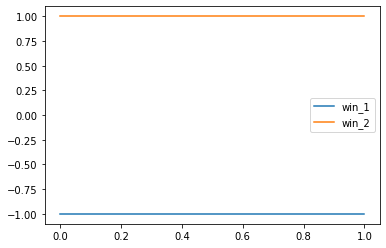

In [10]:
win_1_df = pd.DataFrame(win_1).rolling(5,min_periods=1).mean()
plt.plot(win_1_df, label='win_1')
win_2_df = pd.DataFrame(win_2).rolling(5,min_periods=1).mean()
plt.plot(win_2_df, label='win_2')
plt.legend()
plt.show()

In [11]:
agent_2.loss_1_list

[11.499519348144531, 2.7325522899627686]

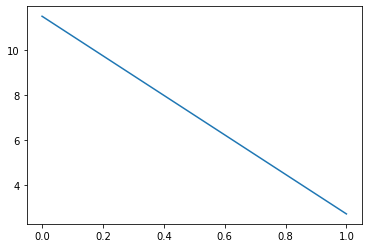

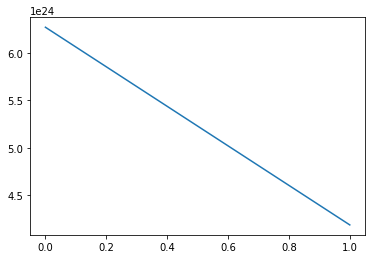

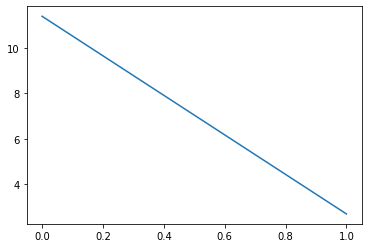

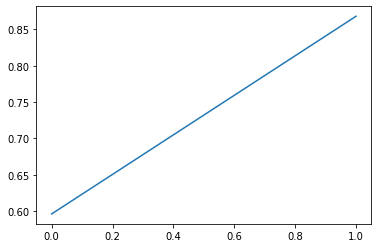

In [12]:
plt.plot(agent_2.loss_1_list)
plt.show()

plt.plot(agent_1.loss_1_list)
plt.show()

plt.plot(agent_1.loss_2_list)
plt.show()

plt.plot(agent_1.loss_3_list)
plt.show()

In [13]:
s = torch.cat([transaction['states'] for transaction in list(memory.memory)[:1]], dim=0)
policy = agent_1.model(s)["policy"]
policy = policy[[2]].detach().numpy()[0]

In [14]:
policy.argmax()

0

In [15]:
a = list(np.where(policy>-1e10)[0])
[random.choice(a) for _ in range(10)]

IndexError: Cannot choose from an empty sequence

In [ ]:
s = torch.cat([transaction['states'] for transaction in list(memory.memory)[:1]], dim=0)
policy = agent_1.model(s)["policy"]
print(s[:,2,:,:].flatten(1).gather(1, policy.argsort(1))[:,-4:].tolist())

In [ ]:
sns.displot(s[:,2,:,:].flatten(1).gather(1, policy.argsort(1))[:,-4:].detach().numpy().flatten())
plt.show()

In [ ]:
random_agent = randomAgent()

In [ ]:
othello = Othello()

w_1=0
w_2=0
draw=0

In [ ]:
for _ in tqdm(range(2000)):
    board, changeable_Pos, Position_Row, Position_Col, Change_Position, done = othello.make()
    while not done:
        if othello.color==1:
            setrow, setcol = agent_1.take_action(board, changeable_Pos, Position_Row, Position_Col, Change_Position)
        else:
            setrow, setcol = random_agent.take_action(board, changeable_Pos, Position_Row, Position_Col, Change_Position)
        board, changeable_Pos, Position_Row, Position_Col, Change_Position, done = othello.step(setrow, setcol)
        if done:
            if len(board[board==1])>len(board[board==2]):
                w_1+=1
            elif len(board[board==1])<len(board[board==2]):
                w_2+=1
            else:
                draw+=1

In [ ]:
print(w_1,w_2,draw)